# Import Dependencies

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re
import seaborn as sns
import collections
import glob
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

# Load Dataset

In [29]:
column_list= ['Col'+str(i) for i in range(15)]
column_list.insert(0, 'Review')

In [30]:
df = pd.read_csv('Evaluation-dataset.csv', names=column_list)
df.head()

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA and Feature Engineering 

In [31]:
# here we created new col which contain all sentences with ,
df['Col16'] = df[df.columns[1:]].apply(lambda x: ', '.join(x.dropna().astype(str)),axis=1)

In [32]:
df.head()

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col16
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, ease of booking positive"
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, value for money positive"
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ease of booking positive
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, e..."


In [33]:
df['Col16'].isnull().sum()

0

In [34]:
df['Review0']= df.apply(lambda x: x['Review'].replace('[REDACTED]', 'the company'), axis=1)

In [35]:
# Creating a feature to check the presence of [REDACTED] in review.
df['is_redacted']= df.apply(lambda x: '[REDACTED]' in x['Review'], axis=1)

In [45]:
df.sample(5)

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col16,Review0,is_redacted
3403,I felt let down by the service provided by [RE...,garage service positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,garage service positive,I felt let down by the service provided by the...,True
3117,"Competative on price, quick delivery available...",location positive,value for money positive,delivery punctuality positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, d...","Competative on price, quick delivery available...",False
3263,Worth paying £12 for mobile service,mobile fitter positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"mobile fitter positive, value for money positive",Worth paying £12 for mobile service,False
9194,Outstanding service. From start to finish this...,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive,Outstanding service. From start to finish this...,True
9073,[REDACTED] offers top brand tyres at very comp...,value for money positive,location positive,tyre quality positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"value for money positive, location positive, t...",the company offers top brand tyres at very com...,True


In [37]:
df['is_redacted'].value_counts()

False    8502
True     1630
Name: is_redacted, dtype: int64

Here we can see the values of TRUE and FALSE 

In [39]:
#Review dataframe is created for exploring the types and distribution of sentiments across the data.

In [40]:
#total type of reviews present in the original dataset

review= pd.DataFrame(df['Col0'].value_counts())

for i in df.columns[2:16]:
    review= pd.concat([review, pd.DataFrame(df[i].value_counts())])

In [41]:
review.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14
value for money positive,3334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garage service positive,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ease of booking positive,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location positive,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length of fitting positive,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
review.shape

(330, 15)

In [43]:
# 'Sum' column contains the count of each sentiment with their polarity tags in all col

review['Sum']= review.fillna(0).apply(lambda x: sum(x), axis=1)
review.reset_index(inplace= True)
review.rename(columns= {'index':'Reviews'}, inplace= True)

In [44]:
review.head()

,Reviews,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Sum
0,value for money positive,3334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3334.0
1,garage service positive,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1106.0
2,ease of booking positive,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.0
3,location positive,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0
4,length of fitting positive,285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.0


In [47]:
positive= review[review['Reviews'].str.contains("positive")]
negative= review[review['Reviews'].str.contains("negative")]
print('Total no. of sentiments with positive polarity tag : {}'.format(positive['Sum'].sum()))
print('Total no. of sentiments with negative polarity tag : {}'.format(negative['Sum'].sum()))
print('Total size of data: {}'.format(df.shape[0]))

# here we can see the class is imbalance, also there both negative and positive contain.

Total no. of sentiments with positive polarity tag : 11889.0
Total no. of sentiments with negative polarity tag : 2611.0
Total size of data: 10132


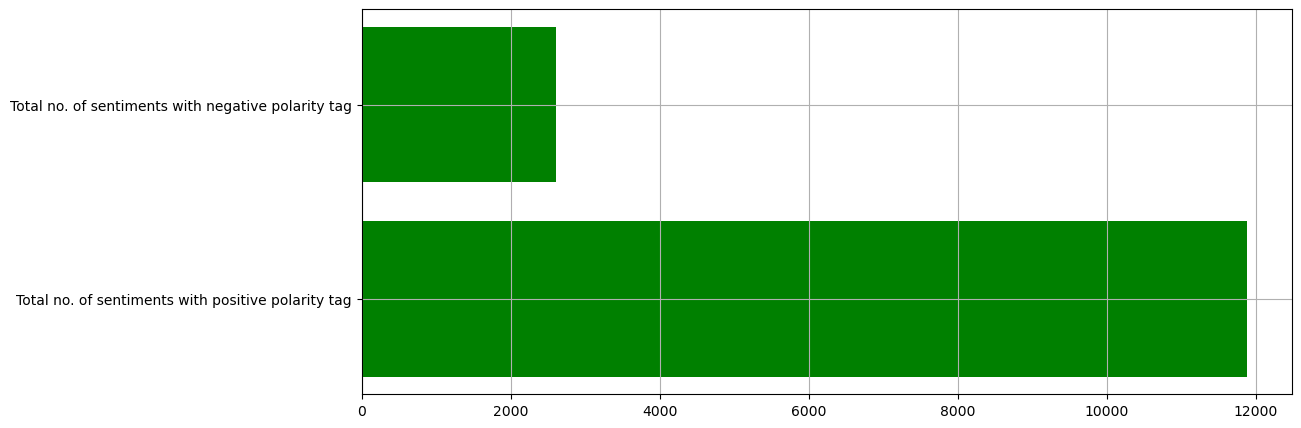

In [71]:
y= [positive['Sum'].sum(), negative['Sum'].sum()]
x= ['Total no. of sentiments with positive polarity tag', 'Total no. of sentiments with negative polarity tag']

plt.figure(figsize = (12,5))
plt.barh(x,y, color = "g")
plt.grid(True)

In [78]:
x= df[df['Col16'].str.contains('positive')].shape[0]
y= df[df['Col16'].str.contains('negative')].shape[0]
z= df[~df['Col16'].str.contains('positive')].shape[0]

print('Total rows containing at least one positive sentiment: ', x)
print('Total rows containing at least one negative sentiment: ', y)
print('Total rows containing neither positive nor negative sentiment: ', z-y)

Total rows containing at least one positive sentiment:  7184
Total rows containing at least one negative sentiment:  1469
Total rows containing neither positive nor negative sentiment:  1479


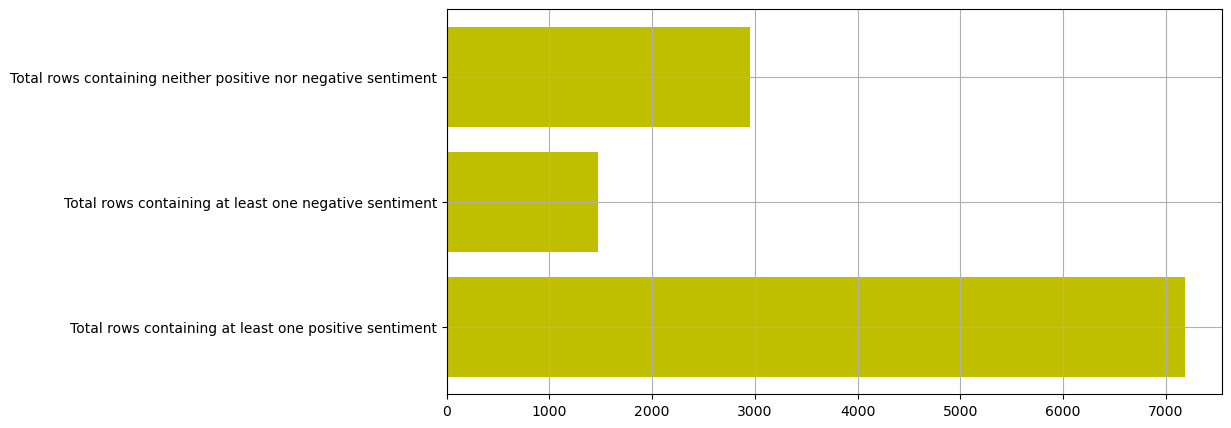

In [82]:
ax= [x,y,z]
ordinate= ['Total rows containing at least one positive sentiment', 'Total rows containing at least one negative sentiment','Total rows containing neither positive nor negative sentiment']

plt.figure(figsize = (10,5))
plt.barh(ordinate,ax, color = "y")
plt.grid(True)

In [80]:
df['Col16'][10130]

''

In [83]:
 df.drop(df[~df['Col16'].str.contains('negative|positive')].index, inplace= True)

In [85]:
df.shape

(8125, 19)

In [87]:
df.tail(3) #intex is changed reset requred

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col16,Review0,is_redacted
10127,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"refund positive, delivery punctuality positive...","I ordered the wrong tyres, however the company...",True
10128,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,length of fitting positive,"Good experience, first time I have used the co...",True
10129,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, delivery punctuality positi...","I ordered the tyre I needed on line, booked a ...",True


In [88]:
df.reset_index(inplace=True)
df= df.drop(['index'],axis=1)


In [90]:
df.tail(3) #here we set

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col16,Review0,is_redacted
8122,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"refund positive, delivery punctuality positive...","I ordered the wrong tyres, however the company...",True
8123,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,length of fitting positive,"Good experience, first time I have used the co...",True
8124,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, delivery punctuality positi...","I ordered the tyre I needed on line, booked a ...",True


In [91]:
df= df.drop([])

In [94]:
df.head()

,Review,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col16,Review0,is_redacted
0,Tires where delivered to the garage of my choi...,garage service positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, ease of booking positive",Tires where delivered to the garage of my choi...,False
1,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"garage service positive, value for money positive","Easy Tyre Selection Process, Competitive Prici...",False
2,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,value for money positive,Very easy to use and good value for money.,False
3,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ease of booking positive,Really easy and convenient to arrange,False
4,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"location positive, value for money positive, e...",It was so easy to select tyre sizes and arrang...,False


In [97]:
def sterilization(df):
    
    df = re.sub('https?://\S+|www\.\S+', '', df) #remove any HTTP link
    df = re.sub('<*>', '', df)
    emoj = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    emoj.sub(r'', df)
    df = re.sub(r'\w*\d\w*','', df) #remove any number of alphanumeric shortcuts used in comments
    df = re.sub(r'\s+', ' ', df)    #remove white space character

    return df

In [98]:
# Cleaning data...
df['Review0']=df['Review0'].apply(lambda x : sterilization(x))

In [100]:
# Changing column order for better view of dataset

df= df.drop(['Col0', 'Col1', 'Col2', 'Col3', 'Col4',
       'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
       'Col11', 'Col12', 'Col13', 'Col14' ], axis=1)

In [103]:
df.head()

,Review,Col16,Review0,is_redacted
0,Tires where delivered to the garage of my choi...,"garage service positive, ease of booking positive",Tires where delivered to the garage of my choi...,False
1,"Easy Tyre Selection Process, Competitive Prici...","garage service positive, value for money positive","Easy Tyre Selection Process, Competitive Prici...",False
2,Very easy to use and good value for money.,value for money positive,Very easy to use and good value for money.,False
3,Really easy and convenient to arrange,ease of booking positive,Really easy and convenient to arrange,False
4,It was so easy to select tyre sizes and arrang...,"location positive, value for money positive, e...",It was so easy to select tyre sizes and arrang...,False


# Model Training 

In [114]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [115]:

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])
max_len = max([len(x) for x in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

In [116]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, df['is_redacted'], test_size=0.2)


In [119]:
# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [120]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [123]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 105s 515ms/step - accuracy: 0.8157 - loss: 0.4799 - val_accuracy: 0.8363 - val_loss: 0.4462
Epoch 2/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 106s 521ms/step - accuracy: 0.8238 - loss: 0.4666 - val_accuracy: 0.8363 - val_loss: 0.4471
Epoch 3/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 142s 518ms/step - accuracy: 0.8110 - loss: 0.4855 - val_accuracy: 0.8363 - val_loss: 0.4452
Epoch 4/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 104s 510ms/step - accuracy: 0.8223 - loss: 0.4684 - val_accuracy: 0.8363 - val_loss: 0.4475
Epoch 5/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 98s 480ms/step - accuracy: 0.8173 - loss: 0.4771 - val_accuracy: 0.8363 - val_loss: 0.4471


<Figure size 800x500 with 0 Axes>

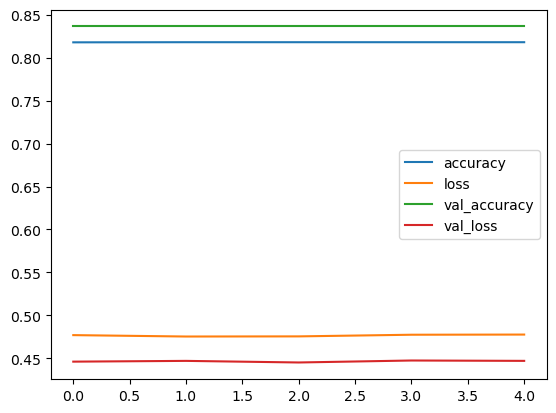

In [124]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [125]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.8519 - loss: 0.4246
Test Accuracy: 0.8363077044487


In [130]:
model.save('model.h5')

In [129]:
import gradio as gr


def predict_sentiment(text):

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    prediction = model.predict(padded_sequence)[0][0]

    if prediction >= 0.5:
        return "Positive", prediction
    else:
        return "Negative", prediction


iface = gr.Interface(fn=predict_sentiment, 
                     inputs=gr.Textbox(lines=2, placeholder='Comment to score'),  # Updated input component
                     outputs=gr.Textbox(),
                     title="Sentiment Analysis", 
                     description="Enter your review text and get sentiment prediction.")


iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
